In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from time import time
import pprint
import joblib
import warnings
warnings.filterwarnings("ignore")

# Classifiers
from catboost import CatBoostClassifier

# Model selection
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from time import time

In [5]:
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [6]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
df=pd.read_csv("Mobile Price Classification.csv")

In [9]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [11]:
#This project represents the sales data of mobile phones from various competitor brands.
#In this dataset, we are going to estimate price of mobiles for a new company by considering competitive mobile phone market 
#Data visulaization has been carried to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. 

In [12]:
df.shape    #There are 2000 rows and 21 columns  

(2000, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [14]:
df.isnull().sum()                         #Hence,there is no null value in this data

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='price_range', ylabel='count'>

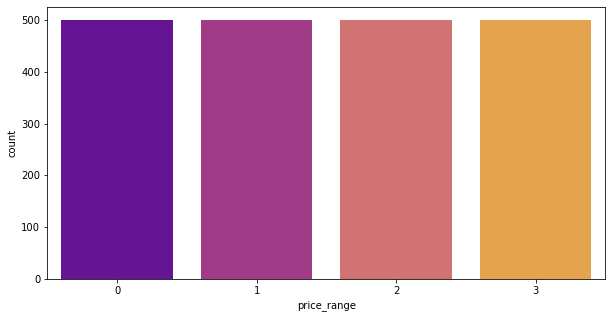

In [15]:
plt.figure(figsize=(10,5))

sns.countplot(x=df.price_range,palette='plasma')
#For every price range, we have the same number of phone.

In [16]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

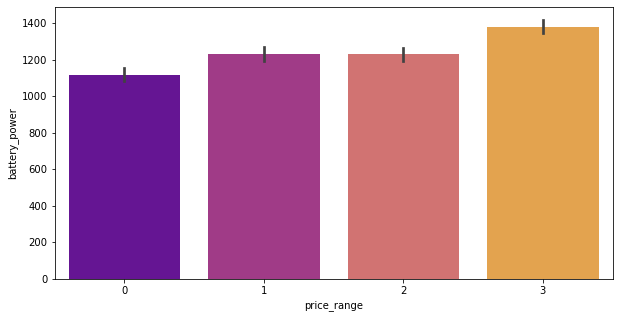

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x='price_range',y='battery_power',data=df,palette='plasma')
#We checked the impact of the battery power on the price range
#Hence, battery power of the most expensive phone have better battery than others

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='blue', ylabel='count'>

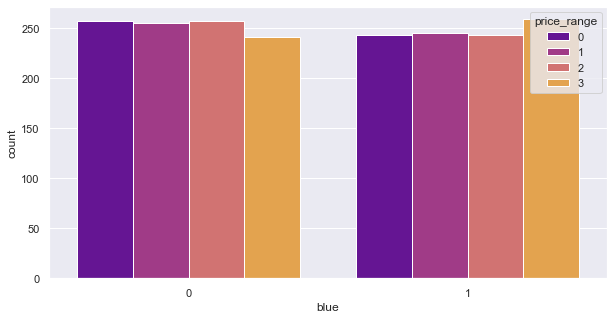

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.blue,hue=df.price_range,palette='plasma')
#We checked the impact of the bluetooth on the price range
#We can interpret that the bluetooth do not have much impact on the price range.

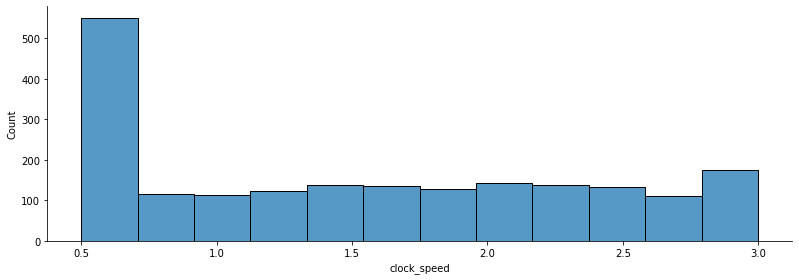

In [19]:
sns.displot( x=df.clock_speed, height=4, aspect=2.8) 

In [20]:
df_corr = df.corr()
df_corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


Text(0.5, 1.0, 'Correlation Between Features')

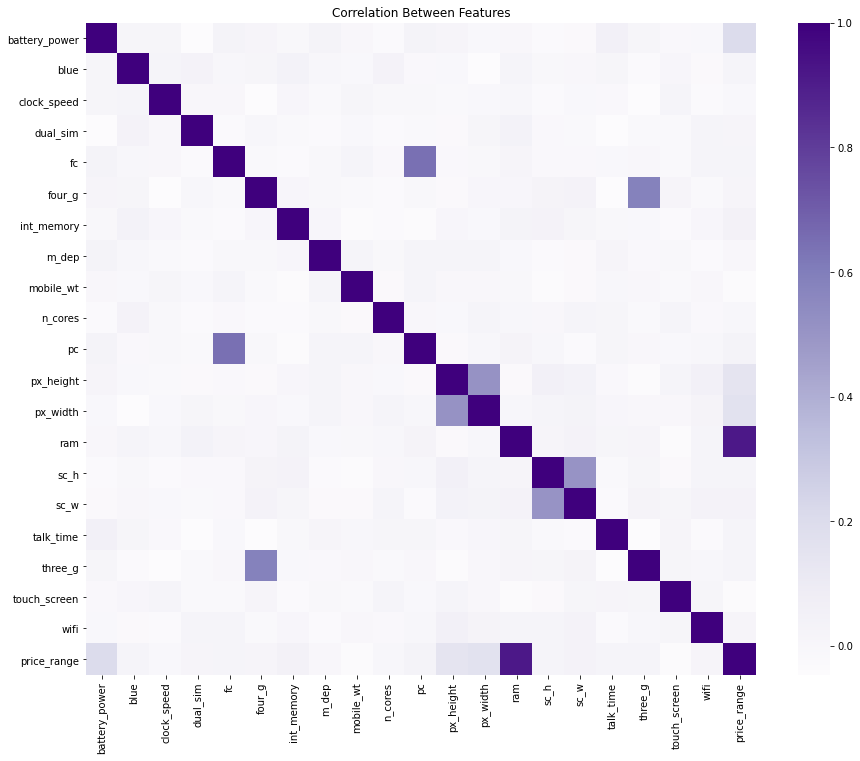

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation Between Features")
#our target price range has highly positive correlation between ram, 3G and 4G, pc(Primary Camera mega pixels) 
#and fc(Front Camera mega pixels),px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
#sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)
#Meaning - as long as sc_w (screen width of mobile) increase, sc_h(screen height of mobile) is increasing.

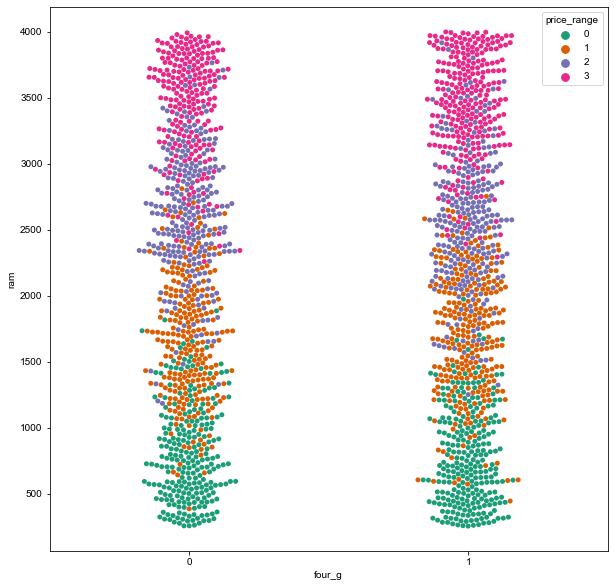

In [37]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")
#Following boxplots show 4G or not and ram values according to price range

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='n_cores', ylabel='count'>

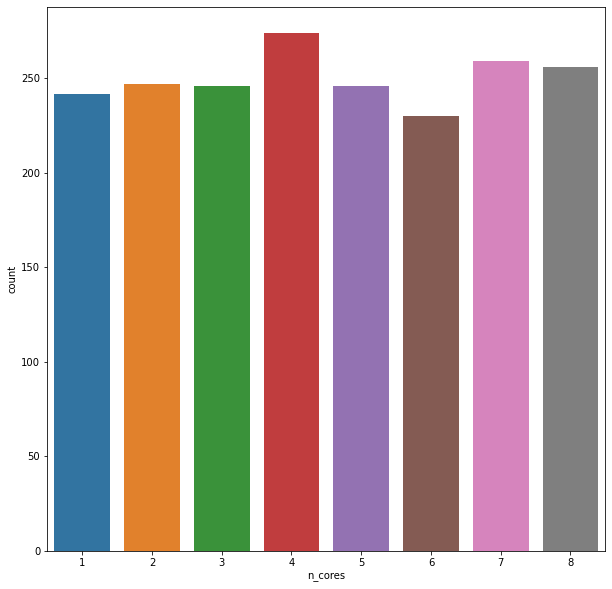

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x='n_cores',data=df)             
#Highest numbers of core processors in the mobile phones is 4
plt.show()

In [23]:
# Divide data into predictors and target
#     First 20 columns are predictors

X = df.iloc[ :, 0:20]
X.head(2)

# 21st column is target
print("\n\nTarget,y, values")
y = df.iloc[ : , 20]
y.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0




Target,y, values


0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.35,
                                                    shuffle = True,
                                                    stratify = y
                                                    )

# 4.1
X_train.shape        
X_test.shape         
y_train.shape        
y_test.shape  

(1300, 20)

(700, 20)

(1300,)

(700,)

In [25]:
steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

pipe_xg = Pipeline(steps_xg)

In [26]:
print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()



--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, gamma=None,
                 gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                 max_leaves=None, min_child_weight=None, missing=nan,
                 monotone_constraints=None, n_estimators=100, n_jobs=3,
                 num_parallel_tree=None, predictor=None, random_state=None,
                 reg_alpha=None, reg_lambda=None, ...))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(base_score=None, booster=None, callbacks=None,
               c

**Define parameter space**
**As we know which parameters can be tuned, specify parameter space**

In [27]:
#Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], 
             'xg__n_estimators':   [20,  30],
              'xg__max_depth':      [4,6],
              'pca__n_components' : [20,15],
              'xg__booster': ['gbtree','gblinear']
              }    

In [28]:
#Define revised dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], 
               'xg__max_depth':      [5,6],
 
              'pca__n_components' : [20,15],
               }                               # Total: 2 * 2 * 2 

**Instantiate GridSearchCV class**

In [29]:
clf = GridSearchCV(pipe_xg,            
                   parameters,         
                   n_jobs = 2,         
                   cv =2 ,             
                   verbose =1,         
                   scoring = ['accuracy', 'roc_auc'],  
                   refit = 'roc_auc')  

In [30]:
from time import sleep
from time import *             #meaning from time import EVERYTHING
import time

**Model fitting**

In [31]:
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60 



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[23:35:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_p

0.1252936323483785

**Performance Scores**

In [32]:
y_pred = clf.predict(X_test) 

In [33]:
# Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0 



--Accuracy Score--



61.57142857142858

In [34]:
# Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)



--Confusion Matrix--



array([[140,  34,   1,   0],
       [ 50,  82,  38,   5],
       [  6,  48,  79,  42],
       [  0,   6,  39, 130]], dtype=int64)

In [35]:
print("\n\n--F1 Score ")
f1_score(y_test,y_pred,average ='micro')      



# 7.8 ROC curve and get AUC
print("\n\n--ROC curve--\n")
_=plot_roc_curve(clf, x_test , y_test)



--F1 Score 


0.6157142857142858



--ROC curve--



NameError: name 'x_test' is not defined

**Feature importance**

In [ ]:
clf.best_estimator_.named_steps["xg"].feature_importances_.shape


print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_

In [ ]:
colnames = X.columns.tolist()

In [ ]:
# Dataframe of feature importances
# with names of columns and sorted by feature-imp

imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')


df_impimp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

df_imp

In [ ]:
list(df_imp.index.values[:5])

**Retraining model with imp features**

In [ ]:
                                                
parameters = {'xg__learning_rate':  [0.03, 0.05],
                                                  
                            'xg__n_estimators':   [20,  30],
              'xg__max_depth':      [4,6],
              'pca__n_components' : [5,6],
              'xg__booster': ['gbtree','gblinear']
              }    

In [ ]:
parameters = {'xg__learning_rate':  [0.03, 0.05], 
                                                 
               'xg__max_depth':      [5,6],
 
              'pca__n_components' : [5,6],
               }                               # Total: 2 * 2 * 2 * 2

**Grid Search**

In [ ]:
Xtrain = X_train.drop(columns = list(df_imp.index.values[:3]))
Xtest = X_test.drop(columns = list(df_imp.index.values[:3]))

# Build model again with reduced dataset
clf_dr = GridSearchCV(pipe_xg,            
                      parameters,         
                      n_jobs = 2,        
                      cv =3 ,             
                      verbose =2,         
                      scoring = ['accuracy', 'roc_auc'],  
                      refit = 'roc_auc'   
                     )

            
start = time.time()
clf_dr.fit(Xtrain, y_train)
end = time.time()
(end - start)/60   # 25 minutes

In [ ]:
y_pred_dr = clf_dr.predict(Xtest)

In [ ]:
f1_score(y_test,y_pred_dr, average ='micro')      
    
f1_score(y_test,y_pred, average ='micro') 

**Random Search code to discover best pipeline parameters**

In [ ]:
import os
import gc
import random

 Used in Randomized parameter search
from scipy.stats import uniform

In [ ]:


# Tune parameters using randomized search
# Hyperparameters to tune and their ranges
parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,300),
              'xg__max_depth':      range(3,10),
              'pca__n_components' : range(10,13)}

In [ ]:
#Tune parameters using random search
#     Create the object first

rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          scoring= ['roc_auc', 'accuracy'],
                          n_iter=4,          
                          verbose = 1,
                          refit = 'roc_auc',
                          n_jobs = 2,         
                          cv = 2              
                                              
                        )

In [ ]:
start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   # 25 minutes

In [ ]:
#9.3 Evaluate
f"Best score: {rs.best_score_} " ;print()           
f"Best parameter set: {rs.best_params_} " ; print()


# 9.4 Make predictions from the best returned model
y_pred = rs.predict(X_test)


# 9.5 Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()      
f"f1 score: {f1_score(y_test,y_pred,average ='micro') }" ; print()